# Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold,SelectKBest,f_classif,chi2
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import shap
import scikitplot as skplt

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
# Load the data
data = pd.read_csv('C:/DATAIOD/Travel.csv')
df = data.copy()

# view info attributes and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

Data Description

- CustomerID : Unique customer ID
- ProdTaken : Product taken or not (0: No, 1: Yes)
- Age : Age of customer
- TypeofContact : How customer was contacted (Company Invited or Self Inquiry)
- CityTier : City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e.
- DurationOfPitch : Duration of the pitch by a salesperson to the customer
- Occupation : Occupation of customer
- Gender : Gender of customer
- NumberOfPersonVisiting : Total number of persons planning to take the trip with the customer
- NumberOfFollowups : Total number of follow-ups has been done by the salesperson after the sales pitch
- ProductPitched : Product pitched by the salesperson
- PreferredPropertyStar : Preferred hotel property rating by customer
- MaritalStatus : Marital status of customer
- NumberOfTrips : Average number of trips in a year by customer
- Passport : The customer has a passport or not (0: No, 1: Yes)
- PitchSatisfactionScore : Sales pitch satisfaction score
- OwnCar : Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting : Total number of children with age less than 5 planning to take the trip with the customer
- Designation : Designation of the customer in the current organization
- MonthlyIncome : Gross monthly income of the customer

# Data Understanding

In [3]:
# view 5 rows sample of data
df.sample(5, random_state=100)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3476,203476,1,40.0,Company Invited,1,9.0,Salaried,Female,3,5.0,Basic,5.0,Unmarried,4.0,1,3,0,1.0,Executive,22324.0
1011,201011,0,36.0,Self Enquiry,3,9.0,Small Business,Fe Male,2,3.0,Deluxe,4.0,Unmarried,4.0,1,4,0,1.0,Manager,24278.0
159,200159,0,34.0,Company Invited,3,8.0,Small Business,Female,3,3.0,Basic,3.0,Divorced,7.0,0,5,1,2.0,Executive,17231.0
2477,202477,1,40.0,Self Enquiry,3,12.0,Large Business,Male,3,4.0,Deluxe,3.0,Divorced,5.0,0,2,0,2.0,Manager,20764.0
291,200291,0,36.0,Self Enquiry,1,NaN,Large Business,Male,1,3.0,Deluxe,4.0,Single,5.0,0,2,1,0.0,Manager,19485.0


# Descriptive Statistics

In [4]:

# statistics of numerical columns
df.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [5]:
# statistics of categorical columns
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


In [6]:
# proportion of count data on categorical columns
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

TypeofContact
Self Enquiry       70.820481
Company Invited    29.179519
Name: proportion, dtype: float64
---------------------------
Occupation
Salaried          48.445172
Small Business    42.635025
Large Business     8.878887
Free Lancer        0.040917
Name: proportion, dtype: float64
---------------------------
Gender
Male       59.656301
Female     37.172668
Fe Male     3.171031
Name: proportion, dtype: float64
---------------------------
ProductPitched
Basic           37.684124
Deluxe          35.433715
Standard        15.180033
Super Deluxe     6.996727
King             4.705401
Name: proportion, dtype: float64
---------------------------
MaritalStatus
Married      47.872340
Divorced     19.435352
Single       18.739771
Unmarried    13.952537
Name: proportion, dtype: float64
---------------------------
Designation
Executive         37.684124
Manager           35.433715
Senior Manager    15.180033
AVP                6.996727
VP                 4.705401
Name: proportion, dtype: fl

In [7]:
# check duplicate rows
print('Are there any duplicate rows?', df.drop('CustomerID', axis=1).duplicated().any())
duplicate_rows = df.drop('CustomerID', axis=1).duplicated().sum()
print('Of the entire data, {} rows of duplicate data have been found'. format(duplicate_rows))

Are there any duplicate rows? True
Of the entire data, 141 rows of duplicate data have been found


# Univariate Analysis

In [8]:
# define numerical & categorical columns
num_cols = df.select_dtypes(exclude='object').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

# print columns
print('We have {} numerical columns : {}'.format(len(num_cols), num_cols))
print('\nWe have {} categorical columns : {}'.format(len(cat_cols), cat_cols))

We have 14 numerical columns : ['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']

We have 6 categorical columns : ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


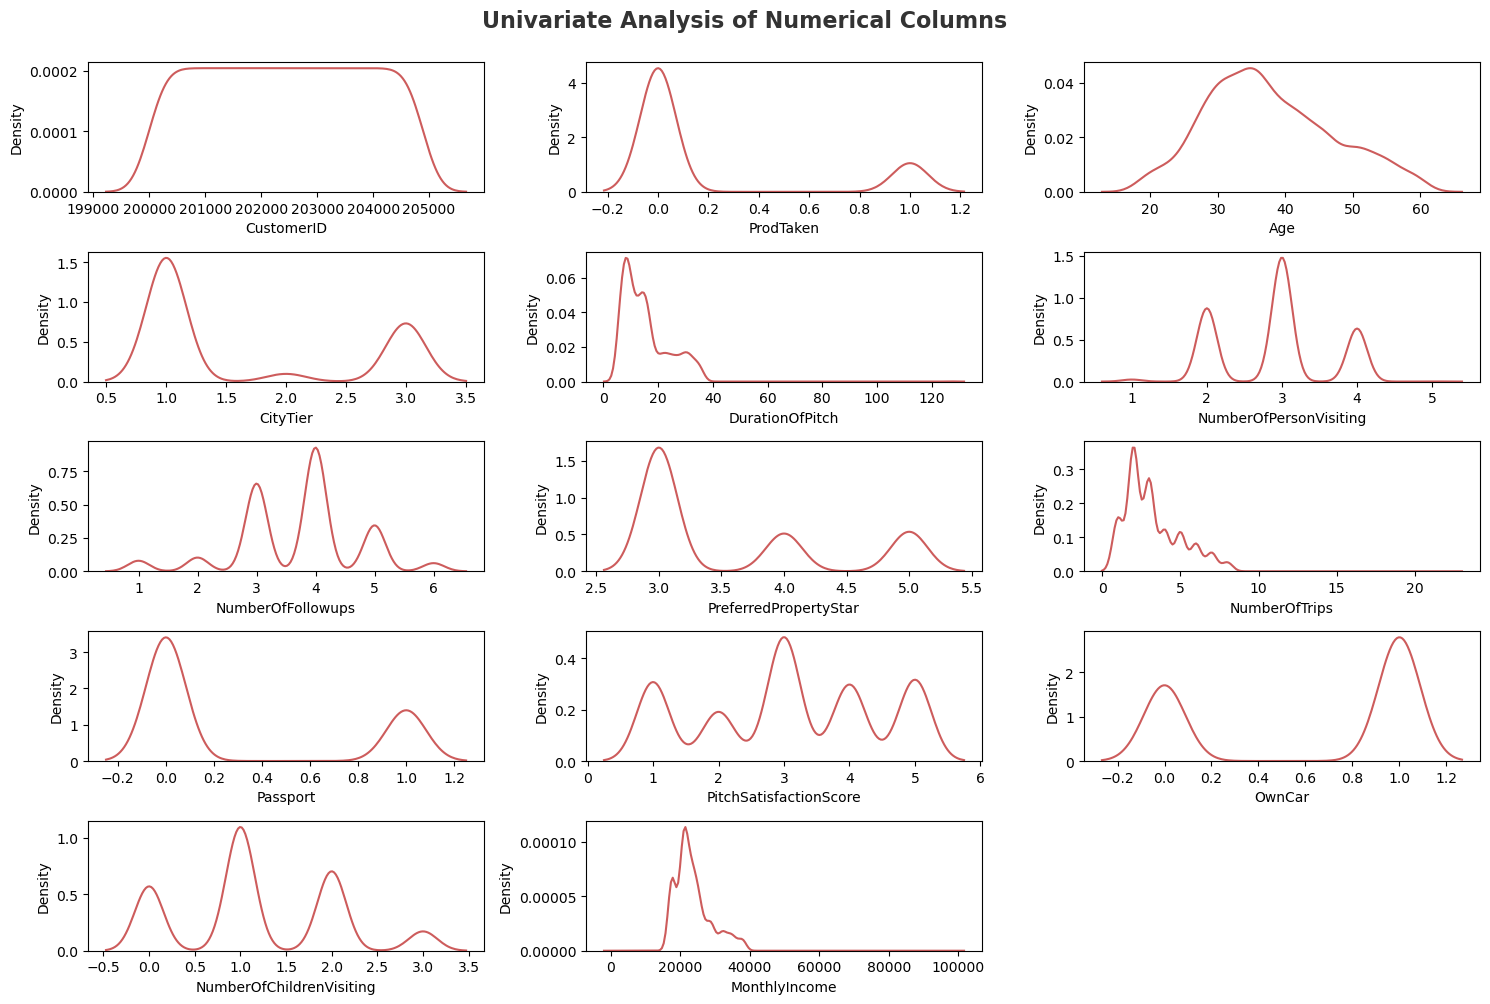

In [9]:
# numerical columns
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=16, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(num_cols)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_cols[i]], color='indianred')
    plt.xlabel(num_cols[i])
    plt.tight_layout()
    
# save plot
plt.savefig('C:/DATAIOD/univariate_analysis_num.png')

From the results of this visualization it can be concluded that:

- The CustomerID column has too much data spread, perhaps because the customers in each row are always unique so this column can be deleted later.
- The Age column seems to approximate a normal distribution.
- The DurationOfPitch, NumberOfTrips, and MonthlyIncome columns seem to have a positively skewed data distribution (leaning to the right) which indicates there are outliers.

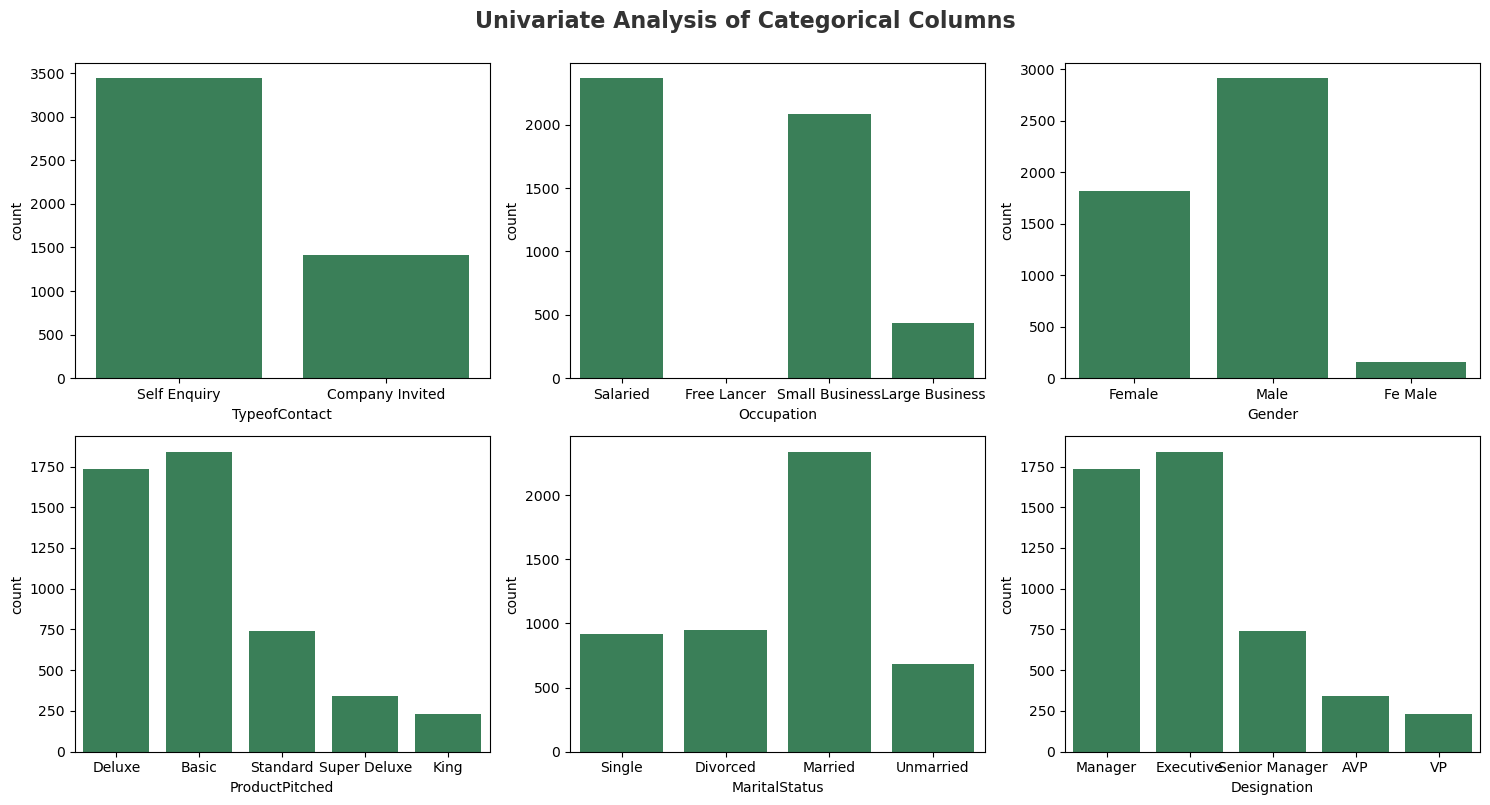

In [10]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Columns', fontsize=16, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_cols)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[cat_cols[i]], color='seagreen')
    plt.tight_layout()
    
# save plot
plt.savefig('C:/DATAIOD/univariate_analysis_cat.png')

From the visualization results above, it can be concluded that:

- The TypeofContact column is dominated (data proportion more than 50%) by Self Inquiry.
- The Occupation column is dominated by Salaried and Small Business, but the number of Free Lancers is too few so they can be deleted later.
- In the Gender column there are more males than females. Apart from that, there was an error in writing the Fe Male category which should have been Female.
- In the ProductPitched and Designation columns, 2 categories dominate.
- The MaritalStatus column is dominated by Married status. Then the statuses Single and Unmarried can be interpreted the same way so they can be combined.

# Multivariate Analysis

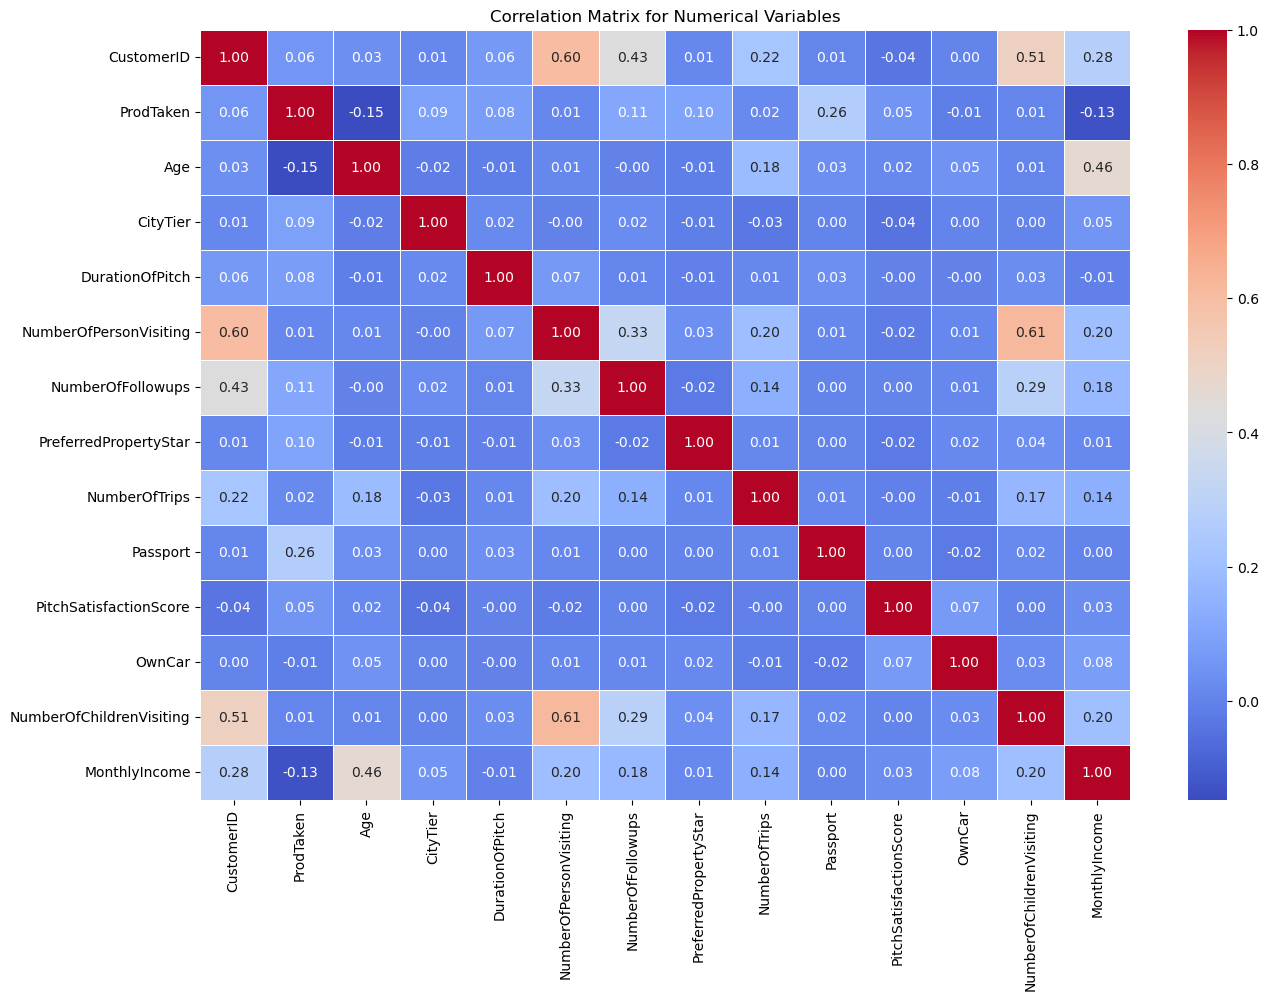

<Figure size 640x480 with 0 Axes>

In [11]:


# Select only numerical columns for the heatmap
numerical_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 10))
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

plt.savefig('C:/DATAIOD/heatmap.png')

From the correlation results it is known that:

- Our target column ProdTaken has a weak negative correlation to Age and MontlyIncome.
- The NumberOfFollowups and Passport columns also have a weak positive correlation to ProdTaken.
- The NumberOfPersonVisiting and NumberOfChildrenVisiting columns have a strong enough positive correlation that they can be combined into a new column feature.

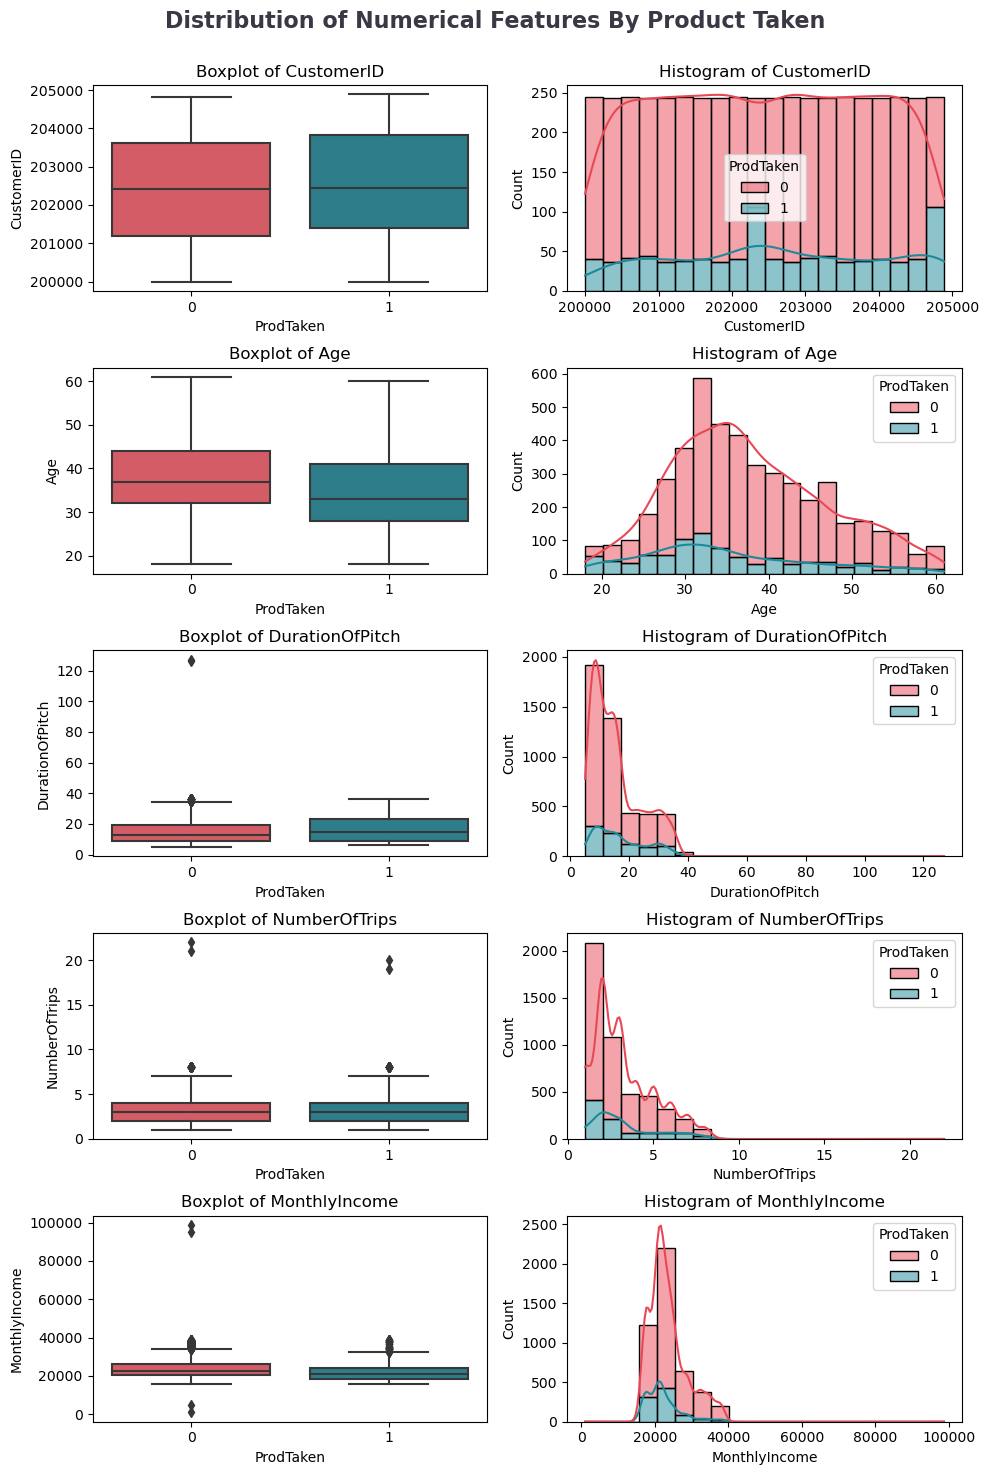

In [12]:
# EDA Numerical Features by Target
num_cols2 = ['CustomerID', 'Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
clr1 = ['#E84855', '#1D8A99']
fig, ax = plt.subplots(5, 2, figsize=(10,15))
fig.suptitle('Distribution of Numerical Features By Product Taken', color='#3C3744',
             fontsize=16, fontweight='bold', ha='center')
for i, col in enumerate(num_cols2):   
    sns.boxplot(data=df, x='ProdTaken', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='ProdTaken', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.savefig('C:/DATAIOD/multivariate_analysis_num.png')

From the results of this visualization it can be concluded that:

- In the CustomerID column, because the data has a unique value for each row, it can be ignored as a feature.
- Customers who buy travel packages are mostly aged 20-35.
- The duration of the sales pitch is under 20 minutes, allowing customers to buy travel packages.
- Most customers take less than 5 trips in a year.
- Customers with monthly incomes ranging from 150000-250000 may be more interested in buying travel packages.

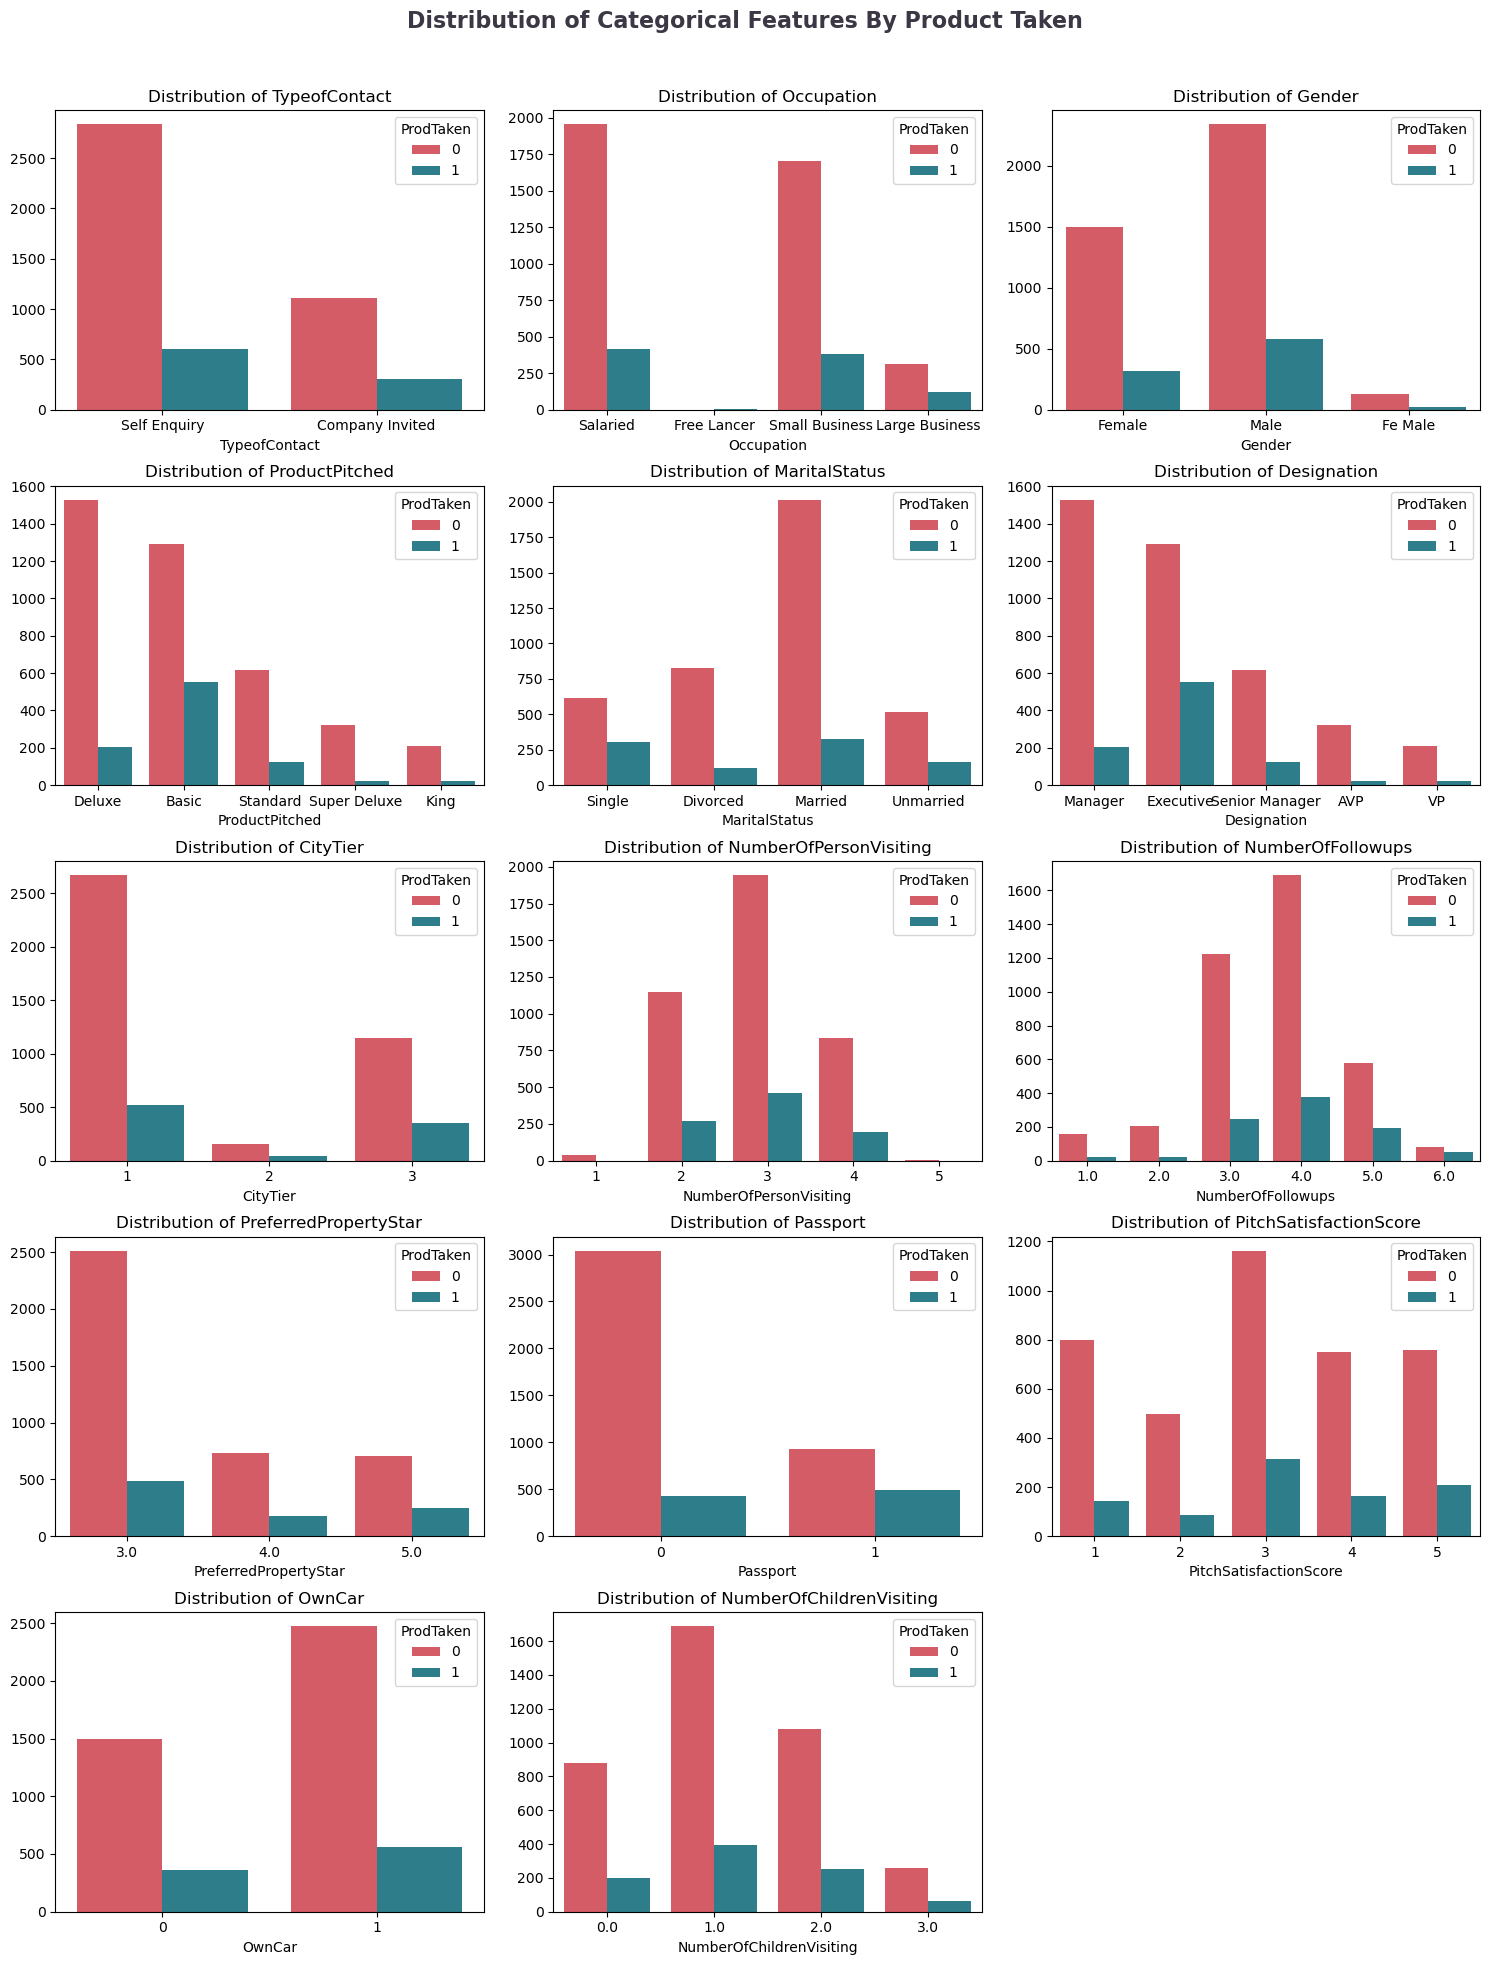

In [13]:
# EDA Categorical Features by Target
cat_cols2 = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation',
            'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
            'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']
clr2 = ['#E84855', '#1D8A99']
fig, axes = plt.subplots(5, 3, figsize=(15,20))
fig.suptitle('Distribution of Categorical Features By Product Taken', color='#3C3744',
             fontsize=16, fontweight='bold')
for ax, col in zip(axes.flatten(), df[cat_cols2].columns):
    sns.countplot(data=df, x=col, hue='ProdTaken', palette=clr2, ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_ylabel('')
axes[4,2].axis('off')
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.savefig('C:/DATAIOD/multivariate_analysis_cat.png')

From the visualization results above, it can be concluded that:

- Customers with the Self Inquiry contact type are more likely to purchase travel packages than Company Invited.
- Customers with Occupation Salaried and Small Business are more interested in buying travel packages, and Free Lancers are - - definitely buying travel packages.
- More male customers buy travel packages than women.
- The basic product types offered by sales to customers are purchased more often.
- Married, single or unmarried customers are more likely to buy travel packages.
- More travel packages offered to Executive customers are purchased.
- Customers in City Tier 1 and 3 are more interested in buying travel packages.
- The number of people who will travel is 2-4 more buying travel packages.
- Customers who were followed up >=3 times after the pitch bought more travel packages.
- Customers who give a rating of 3 to hotel properties that will be used during their holidays buy more travel packages.
- Customers who have passports are slightly more likely to buy travel packages.
- Customers who give a satisfaction score >=3 buy more travel packages.
- Customers who own cars buy more travel packages.

In [14]:
# check proportion target
prop_target = df['ProdTaken'].value_counts(normalize=True) * 100
print('The percentage of customers who do not purchase a travel package is {}%'.format(round(prop_target[0], 1)))
print('The percentage of customers who buy travel packages is {}%'.format(round(prop_target[1], 1)))



The percentage of customers who do not purchase a travel package is 81.2%
The percentage of customers who buy travel packages is 18.8%


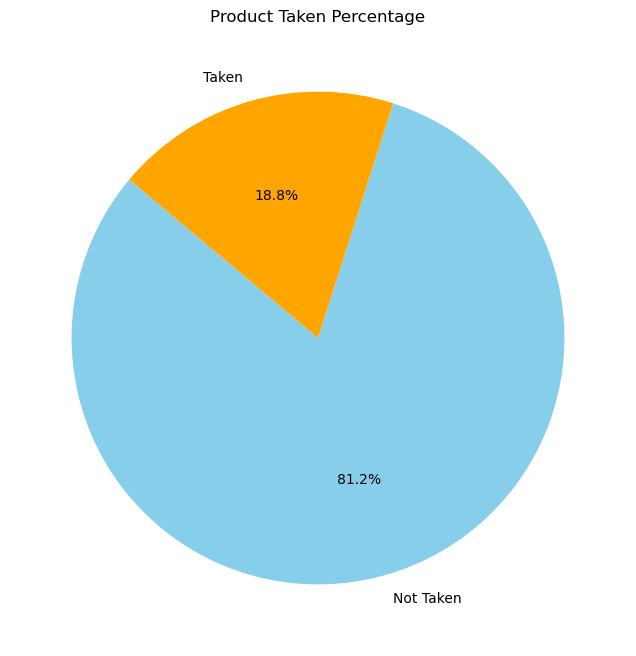

<Figure size 640x480 with 0 Axes>

In [15]:
# Pie chart for Product Taken
plt.figure(figsize=(8, 8))
df['ProdTaken'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'], labels=['Not Taken', 'Taken'])
plt.title('Product Taken Percentage')
plt.ylabel('')
plt.show()

plt.savefig('C:/DATAIOD/proportion_target.png')

# EDA Conclusion

From the results of the EDA that has been carried out it can be concluded that:

- The ProdTaken column is the target to predict.
- The CustomerID column can be deleted because each row has a different customer ID.
- The column names and data types are appropriate, but there are data errors in the Gender column and the same meaning of data in the Marital Status column.
- There are missing values ​​in the columns Age, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome, TypeofContact.
- Numerical columns that appear to have a correlation to the target can be used as features, namely Age, MontlyIncome, NumberOfFollowups and Passport.
- The NumberOfPersonVisiting and NumberOfChildrenVisiting columns have a strong enough positive correlation so they can be combined to become a new feature (TotalVisiting).
- Some numeric columns that appear completely uncorrelated to the target can be deleted.

In [16]:
# copy dataframe for preprocessing
df_prep = df.copy()

# Data Preprocessing

Handling Inconsistent Data

In [17]:
df_prep['Gender'] = df_prep['Gender'].replace('Fe Male', 'Female')
df_prep['MaritalStatus'] = df_prep['MaritalStatus'].replace('Single', 'Unmarried')

print('Gender :', df_prep['Gender'].unique().tolist())
print('Marital Status:', df_prep['MaritalStatus'].unique().tolist())

Gender : ['Female', 'Male']
Marital Status: ['Unmarried', 'Divorced', 'Married']


Handling Missing Values

In [18]:
# counts missing data
missing_cols = df_prep.columns[df_prep.isnull().any()]
df_prep[missing_cols].isnull().sum()

Age                         226
TypeofContact                25
DurationOfPitch             251
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
NumberOfChildrenVisiting     66
MonthlyIncome               233
dtype: int64

In [19]:
# statistics on numerical columns (missing cols)
df_prep[missing_cols].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [20]:
# statistics on categorical columns (missing cols)
df_prep[missing_cols].select_dtypes(include='object').describe()

,TypeofContact
count,4863
unique,2
top,Self Enquiry
freq,3444


From the observations made during EDA, the handling of missing values ​​used is:

- The Age column will be filled with the mean value (data distribution is close to normal).
- The TypeofContact column will be filled with the value 'Unknown' (the mode value is too high).
- The DurationOfPitch column will be filled with the median value (the data distribution contains outliers because it is skewed).
- The NumberOfFollowups column will be filled with the min value (assumed there is no follow up after pitching).
- The PreferredPropertyStar column will be filled with the value 3 (moderate rating value).
- The NumberOfTrips column will be filled with the median value (the data distribution contains outliers because it is skewed).
- The NumberOfChildrenVisiting column will be filled with the value 0 (considered not having children under 5 years).
- The MonthlyIncome column will be filled with the median value (the data distribution contains outliers because it is skewed).

In [21]:
# handling missing values
df_prep['Age'].fillna(df_prep['Age'].mean(), inplace=True)
df_prep['TypeofContact'].fillna('Unknown', inplace=True)
df_prep['DurationOfPitch'].fillna(df_prep['DurationOfPitch'].median(), inplace=True)
df_prep['NumberOfFollowups'].fillna(0, inplace=True)
df_prep['PreferredPropertyStar'].fillna(3, inplace=True)
df_prep['NumberOfTrips'].fillna(df_prep['NumberOfTrips'].median(), inplace=True)
df_prep['NumberOfChildrenVisiting'].fillna(0, inplace=True)
df_prep['MonthlyIncome'].fillna(df_prep['MonthlyIncome'].median(), inplace=True)

In [22]:
# check again if any missing values
print('Are there still columns with null/missing values?', df_prep.isnull().any().any())

Are there still columns with null/missing values? False


# Handling Duplicate Data

In [23]:

# remove CustomerID to see duplicate rows
df_prep.drop('CustomerID', axis=1, inplace=True)
print(f'The number of rows before filtering duplicate data is {df_prep.shape[0]}')

# remove duplicate rows
df_prep.drop_duplicates(inplace=True)
print(f'The number of rows after filtering duplicate data is {df_prep.shape[0]}')

The number of rows before filtering duplicate data is 4888
The number of rows after filtering duplicate data is 4747


# Handling Outlier

In [24]:
# view total rows before filtered
print(f'The number of rows before filtering outliers is {df_prep.shape[0]}')

# handle outlier using z-score
filtered_entries = np.array([True] * len(df_prep))
skewed_cols = ['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
for col in skewed_cols:
    zscore = abs(stats.zscore(df_prep[col]))
    filtered_entries = (zscore < 3) & filtered_entries    

# view total rows after filtered
df_prep = df_prep[filtered_entries]
print(f'The number of rows after filtering outliers is {df_prep.shape[0]}')

The number of rows before filtering outliers is 4747
The number of rows after filtering outliers is 4737


# Feature Engineering

Feature Encoding

In [25]:
# view unique values on categorical columns
for col in df_prep.select_dtypes(include='object').columns:
    print(f'{col} : {df_prep[col].unique().tolist()}')
    print(df_prep[col].value_counts())
    print('------------------------------------------')

TypeofContact : ['Self Enquiry', 'Company Invited', 'Unknown']
TypeofContact
Self Enquiry       3346
Company Invited    1366
Unknown              25
Name: count, dtype: int64
------------------------------------------
Occupation : ['Salaried', 'Free Lancer', 'Small Business', 'Large Business']
Occupation
Salaried          2287
Small Business    2028
Large Business     420
Free Lancer          2
Name: count, dtype: int64
------------------------------------------
Gender : ['Female', 'Male']
Gender
Male      2829
Female    1908
Name: count, dtype: int64
------------------------------------------
ProductPitched : ['Deluxe', 'Basic', 'Standard', 'Super Deluxe', 'King']
ProductPitched
Basic           1794
Deluxe          1680
Standard         714
Super Deluxe     324
King             225
Name: count, dtype: int64
------------------------------------------
MaritalStatus : ['Unmarried', 'Divorced', 'Married']
MaritalStatus
Married      2277
Unmarried    1512
Divorced      948
Name: count, dty

From these results it can be concluded that:

- In the Occupation column, it appears that the number of 'Free Lancer' customers is too small so it can be deleted.
- The Gender column has 2 unique values, so Label Encoding can be done.
- The ProductPitched and Designation columns have unique values ​​of the ordinal data type so Label Encoding can be carried out.
- The TypeofContact, Occupation, and MaritalStatus columns have more than 2 unique values ​​and are not ordinal data types so One Hot Encoding is carried out.

In [26]:
# remove rows with Occupation is `Free Lancer`
df_prep = df_prep[df_prep['Occupation']!='Free Lancer']

# view dimension size of data before encoding
print(f'The dimensions of the data before encoding are {df_prep.shape[0]} row and {df_prep.shape[1]} column')

# label encoding
df_prep['Gender'] = df_prep['Gender'].map({'Female':0, 'Male':1})
df_prep['ProductPitched'] = df_prep['ProductPitched'].map({'Basic':0, 'Standard':1, 'Deluxe':2,
                                                           'Super Deluxe':3, 'King':4})
df_prep['Designation'] = df_prep['Designation'].map({'Manager':0, 'Senior Manager':1, 'Executive':2,
                                                     'AVP':3, 'VP':4})

# one hot encoding
for col in ['TypeofContact', 'Occupation', 'MaritalStatus']:
    onehots = pd.get_dummies(df_prep[col], prefix=col,drop_first=True) #menggunakan drop first = True untuk mengurangi dimensi
    df_prep = pd.concat([df_prep, onehots], axis=1)
    df_prep.drop(columns=col, axis=1, inplace=True)
    
# view dimension size of data before encoding
print(f'The dimensions of the data after encoding are {df_prep.shape[0]} row and {df_prep.shape[1]} column')

The dimensions of the data before encoding are 4735 row and 19 column
The dimensions of the data after encoding are 4735 row and 22 column


# Feature Extraction

In [27]:
# get correlation > +- 0.5
df_corr = df_prep.corr().iloc[1:,1:]
df_corr = df_corr.apply(lambda x: round(x, 3))
dfcorr = []
for idx in df_corr.index:
    for col in df_corr.columns:
        dfcorr.append([idx, col])
        if (np.abs(df_corr.loc[idx, col]) > 0.5) and (idx != col) and [col, idx] not in dfcorr:
            print(f'{idx} with {col} has correlation : {df_corr.loc[idx, col]}')

NumberOfPersonVisiting with NumberOfChildrenVisiting has correlation : 0.595
ProductPitched with MonthlyIncome has correlation : 0.678
Occupation_Salaried with Occupation_Small Business has correlation : -0.837
MaritalStatus_Married with MaritalStatus_Unmarried has correlation : -0.659


In [28]:
# create new column for feature
df_prep['TotalVisiting'] = df_prep['NumberOfPersonVisiting'] + df_prep['NumberOfChildrenVisiting']
df_prep.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

# Split Train & Test Set

In [29]:
X = df_prep.drop('ProdTaken', axis=1)
y = df_prep['ProdTaken']

In [30]:
# splitting into data train and test (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
print(f'The total training data consists of {len(X_train)} rows')
print(f'Number of class 0 : {sum(y_train==0)}')
print(f'Number of class 1 : {sum(y_train==1)}\n')

print(f'The total test data consists of {len(X_test)} rows')
print(f'Number of class 0 : {sum(y_test==0)}')
print(f'Number of class 1 : {sum(y_test==1)}\n')

The total training data consists of 3788 rows
Number of class 0 : 3076
Number of class 1 : 712

The total test data consists of 947 rows
Number of class 0 : 769
Number of class 1 : 178



# Feature Transformation

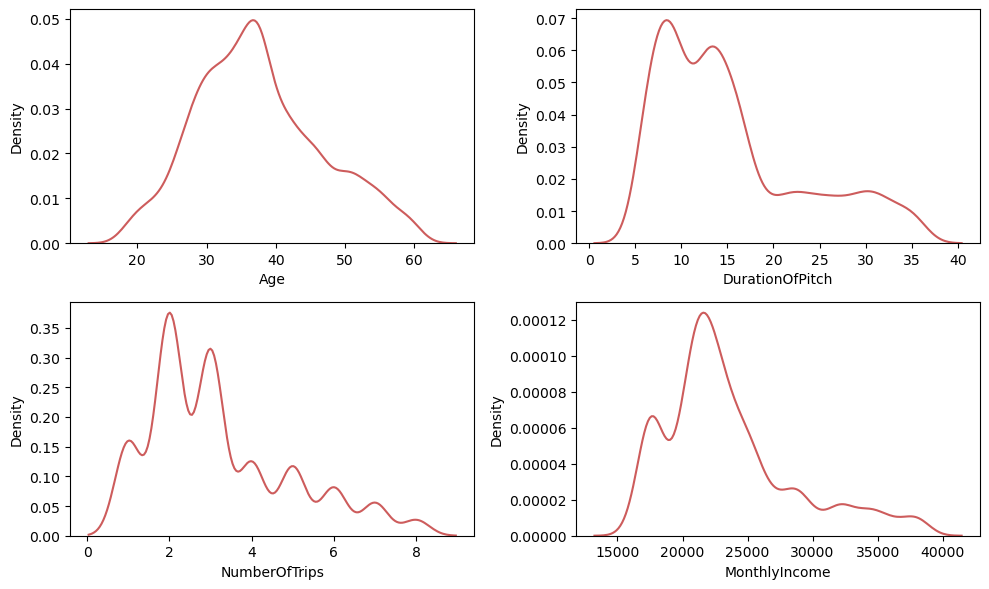

In [31]:
# distribution of data before scaling
plt.figure(figsize=(10, 6))
for i, col in enumerate(['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df_prep[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

Based on the results of this visualization, then:

- The Age column will be scaled with Normalization because it approaches a normal distribution.
- The NumberOfTrips column is not scaled because the data values ​​are not too varied after handling outliers.
- The DurationOfPitch and MonthlyIncome columns will be scaled with Standardization because they are slightly skewed.

In [32]:
# scaling using normalization
scaler = MinMaxScaler()
scaler.fit(X_train['Age'].values.reshape(-1, 1))
X_train['Age'] = scaler.transform(X_train['Age'].values.reshape(-1, 1))
X_test['Age'] = scaler.transform(X_test['Age'].values.reshape(-1, 1))

# scaling using standardization
scaler = StandardScaler()
scaler.fit(X_train['DurationOfPitch'].values.reshape(-1, 1))
X_train['DurationOfPitch'] = scaler.transform(X_train['DurationOfPitch'].values.reshape(-1, 1))
X_test['DurationOfPitch'] = scaler.transform(X_test['DurationOfPitch'].values.reshape(-1, 1))

scaler.fit(X_train['MonthlyIncome'].values.reshape(-1, 1))
X_train['MonthlyIncome'] = scaler.transform(X_train['MonthlyIncome'].values.reshape(-1, 1))
X_test['MonthlyIncome'] = scaler.transform(X_test['MonthlyIncome'].values.reshape(-1, 1))

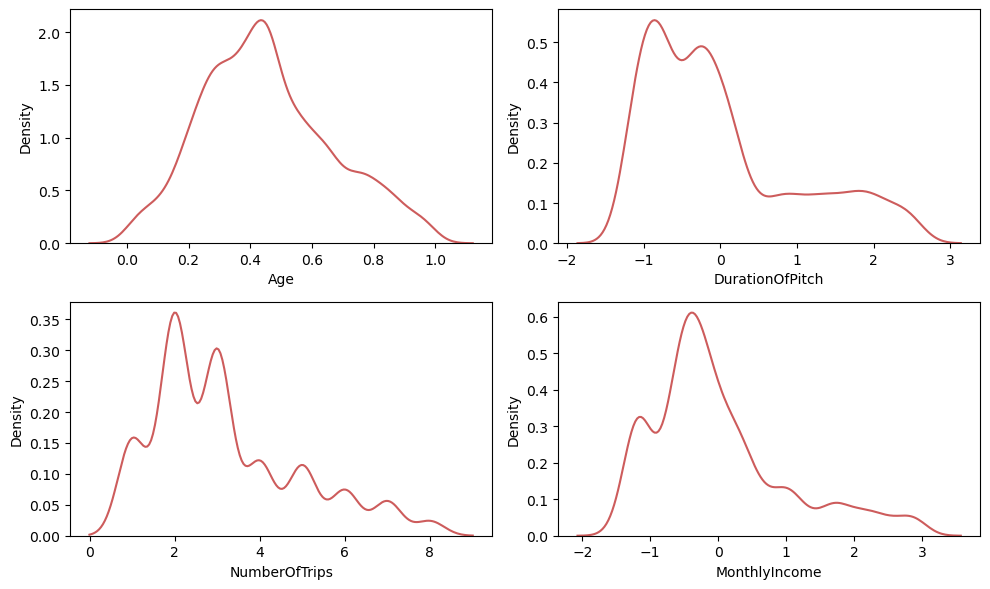

In [33]:
# distribution of data after scaling
plt.figure(figsize=(10, 6))
for i, col in enumerate(['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=X_train[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [34]:
# statistics data after transformation
X_train[['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']].describe()

,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome
count,3788.000000,3788.000000,3788.000000,3.788000e+03
mean,0.453387,0.000000,3.197202,-3.170056e-16
std,0.210871,1.000132,1.745316,1.000132e+00
min,0.000000,-1.283932,1.000000,-1.492633e+00
25%,0.302326,-0.788172,2.000000,-6.095633e-01
50%,0.441860,-0.292411,3.000000,-2.373719e-01
75%,0.581395,0.451230,4.000000,3.789695e-01
max,1.000000,2.558212,8.000000,2.991687e+00


From these statistical results it is known that:

- The Age column has a min value = 0 and a max value = 1 after normalization.
- The NumberOfTrips column has a min value = 1 and a max value = 8 which is considered not to have a very varied data range.

# Feature Selection

In [35]:
# Feature selection using Variance threshold
vars = VarianceThreshold(0.2)
vars.fit(X_train)
X_train_fs = pd.DataFrame(vars.transform(X_train),columns=vars.get_feature_names_out())
X_test_fs = pd.DataFrame(vars.transform(X_test),columns=vars.get_feature_names_out())

In [36]:
# Feature selection using fclassif for numerical feature
nume_cols = ['DurationOfPitch','NumberOfFollowups','NumberOfTrips','MonthlyIncome','TotalVisiting']

classif = SelectKBest(f_classif,k=4)
classif.fit(X_train_fs[nume_cols],y_train)
X_train_fnum = pd.DataFrame(classif.transform(X_train_fs[nume_cols]),columns=classif.get_feature_names_out())
X_test_fnum = pd.DataFrame(classif.transform(X_test_fs[nume_cols]),columns=classif.get_feature_names_out())

In [37]:
# Feature selection using chi2 for categorical feature
cate_cols = ['CityTier','Gender','ProductPitched','PreferredPropertyStar','Passport','PitchSatisfactionScore','OwnCar','Designation',
 'TypeofContact_Self Enquiry','Occupation_Salaried','Occupation_Small Business','MaritalStatus_Married','MaritalStatus_Unmarried',]

chi2 = SelectKBest(chi2,k=8)
chi2.fit(X_train_fs[cate_cols],y_train)
X_train_chi2 = pd.DataFrame(chi2.transform(X_train_fs[cate_cols]),columns=chi2.get_feature_names_out())
X_test_chi2 = pd.DataFrame(chi2.transform(X_test_fs[cate_cols]),columns=chi2.get_feature_names_out())

In [38]:
# merging all feature selection result
all_coll = classif.get_feature_names_out().tolist() + chi2.get_feature_names_out().tolist()
X_train = X_train[all_coll]
X_test = X_test[all_coll]

print(f'The selection result features are : {all_coll}')

The selection result features are : ['DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips', 'MonthlyIncome', 'CityTier', 'ProductPitched', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'Designation', 'MaritalStatus_Married', 'MaritalStatus_Unmarried']


# Handling imbalance data

In [39]:
from imblearn.over_sampling import SMOTE

print(f'The amount of test data before SMOTE consists of {len(X_train)} rows')
print(f'Number of class 0 : {sum(y_train==0)}')
print(f'Number Of class 1 : {sum(y_train==1)}\n')

smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print(f'The amount of test data after SMOTE consists of {len(X_train)} rows')
print(f'Number of Class 0 : {sum(y_train==0)}')
print(f'Number of class 1 : {sum(y_train==1)}\n')


The amount of test data before SMOTE consists of 3788 rows
Number of class 0 : 3076
Number Of class 1 : 712

The amount of test data after SMOTE consists of 4614 rows
Number of Class 0 : 3076
Number of class 1 : 1538



In [40]:
# save file preprocessing into csv
X_train.to_csv('Travel_Preprocessing_train.csv', index=False)
X_test.to_csv('Travel_Preprocessing_test.csv', index=False)

# Model Selection

In [41]:
def plotting_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(1, 1, figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', annot_kws={"fontsize":12}, ax=ax)

    # setting title and axis labels
    plt.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('True Labels', fontsize=12)
    ax.set_title('Confusion Matrix ' + title, fontsize=14)
    ax.xaxis.set_ticklabels(['Not Taken', 'Taken'])
    ax.yaxis.set_ticklabels(['Not Taken', 'Taken'])
    plt.show()
    
    print(f'From {title} Results Are:')
    print(f'- Number Of TP (True Positive) = {cm[1][1]}')
    print(f'- Number Of (True Negative) = {cm[0][0]}')
    print(f'- Number Of (False Positive) = {cm[0][1]}')
    print(f'- Number Of (False Negative) = {cm[1][0]}')

# 1. Logistic Regression

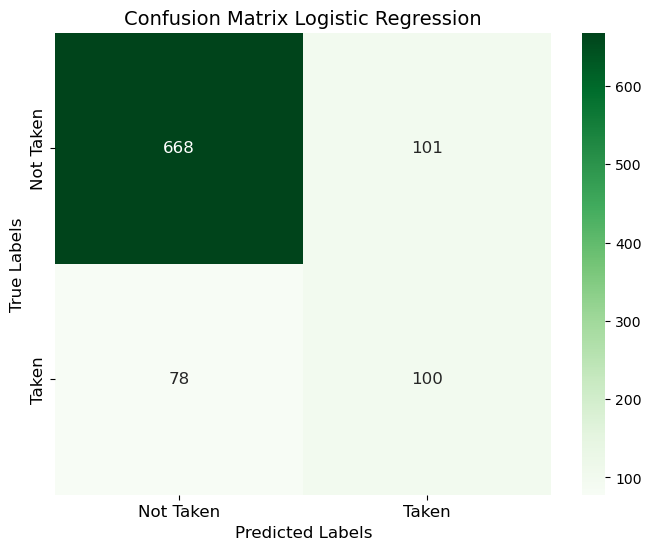

From Logistic Regression Results Are:
- Number Of TP (True Positive) = 100
- Number Of (True Negative) = 668
- Number Of (False Positive) = 101
- Number Of (False Negative) = 78


In [42]:
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

plotting_confusion_matrix(model_lr, X_test, y_test, title='Logistic Regression')

# 2. Decision Tree

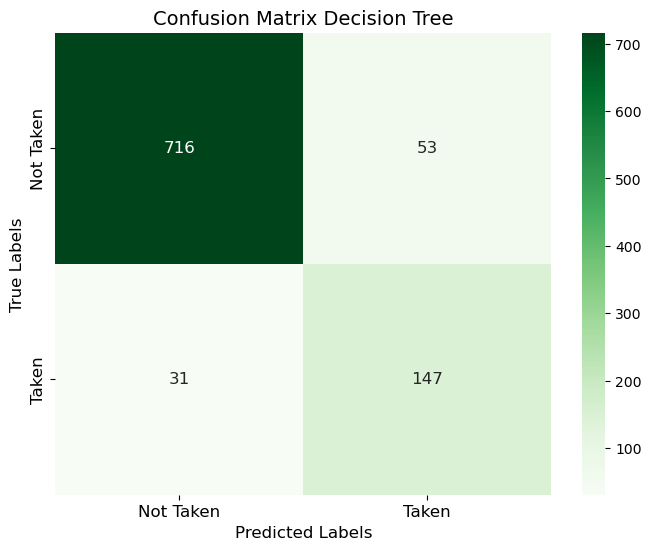

From Decision Tree Results Are:
- Number Of TP (True Positive) = 147
- Number Of (True Negative) = 716
- Number Of (False Positive) = 53
- Number Of (False Negative) = 31


In [43]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

plotting_confusion_matrix(model_dt, X_test, y_test, title='Decision Tree')

# 3. Random Forest

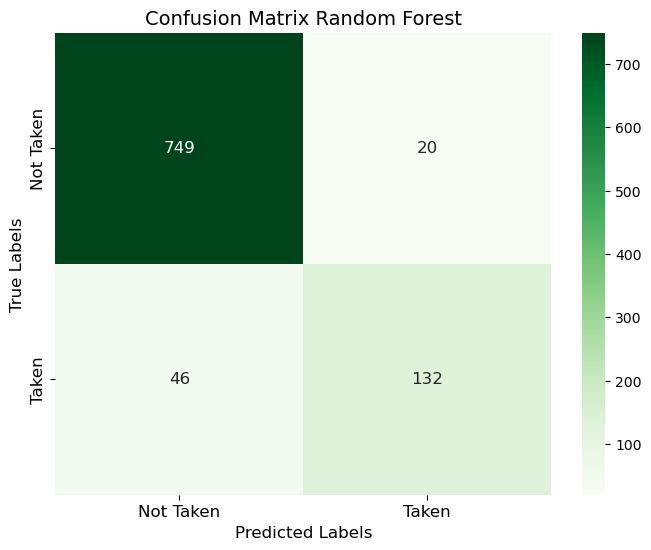

From Random Forest Results Are:
- Number Of TP (True Positive) = 132
- Number Of (True Negative) = 749
- Number Of (False Positive) = 20
- Number Of (False Negative) = 46


In [44]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

plotting_confusion_matrix(model_rf, X_test, y_test, title='Random Forest')

# 4. AdaBoost

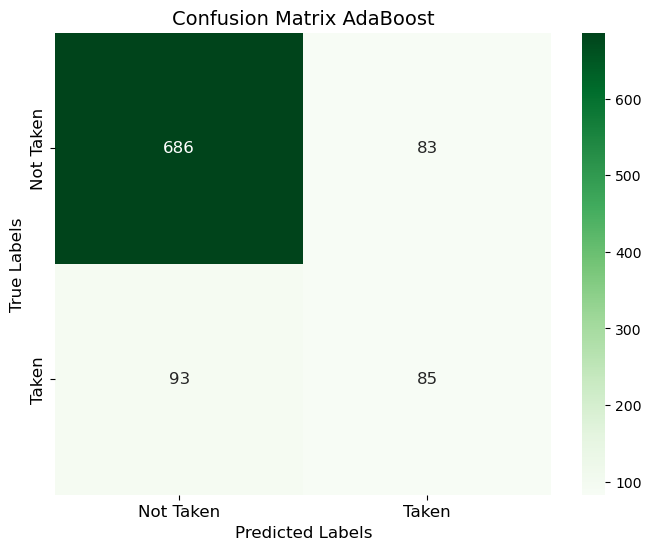

From AdaBoost Results Are:
- Number Of TP (True Positive) = 85
- Number Of (True Negative) = 686
- Number Of (False Positive) = 83
- Number Of (False Negative) = 93


In [45]:
model_adb = AdaBoostClassifier(random_state=42)
model_adb.fit(X_train, y_train)

plotting_confusion_matrix(model_adb, X_test, y_test, title='AdaBoost')

# 5. XGBoost

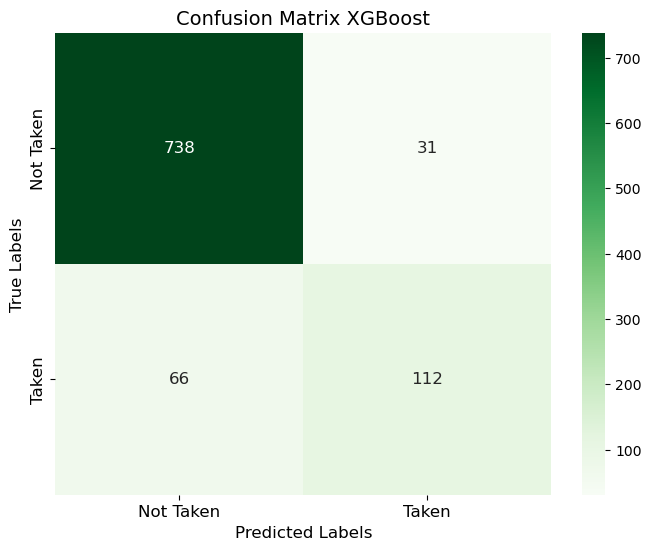

From XGBoost Results Are:
- Number Of TP (True Positive) = 112
- Number Of (True Negative) = 738
- Number Of (False Positive) = 31
- Number Of (False Negative) = 66


In [46]:
model_xgb = XGBClassifier(verbosity=0, random_state=42)
model_xgb.fit(X_train, y_train)

plotting_confusion_matrix(model_xgb, X_test, y_test, title='XGBoost')

# Model Evaluation


In our case, we aim to predict whether customers will buy a travel package based on the available data. It is possible that there are still customers who have the potential to be converted to buy a travel package, then:

The evaluation metric that we will focus on is Accuracy where we want to consider the accuracy in predicting.

In [47]:
def eval_classification(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    mcc = round(matthews_corrcoef(y_test, y_pred), 4)
    auc_test = round(roc_auc_score(y_test, y_pred_proba[:, 1]), 4)
    auc_train = round(roc_auc_score(y_train, y_pred_proba_train[:, 1]), 4)   
    
    return accuracy, precision, recall, f1, mcc, auc_test, auc_train

def score_all_classification(model_list, X_train, y_train, X_test, y_test):
    model_name = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost']
    eval_cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC', 'AUC (Test)', 'AUC (Train)']
    
    eval_list = []
    for name, model in zip(model_name, model_list):
        result = eval_classification(model, X_train, y_train, X_test, y_test)
        eval_list.append([name] + list(result))
    df_model = pd.DataFrame(data=eval_list, columns=eval_cols)
    
    return df_model

In [48]:
# scoring base model
model_list_base = [model_lr, model_dt, model_rf, model_adb, model_xgb]
score_all_classification(model_list_base, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,MCC,AUC (Test),AUC (Train)
0,Logistic Regression,0.8110,0.4975,0.5618,0.5277,0.4113,0.7981,0.8096
1,Decision Tree,0.9113,0.7350,0.8258,0.7778,0.7245,0.8785,1.0000
2,Random Forest,0.9303,0.8684,0.7416,0.8000,0.7616,0.9598,1.0000
3,AdaBoost,0.8141,0.5060,0.4775,0.4913,0.3780,0.7892,0.8648
4,XGBoost,0.8976,0.7832,0.6292,0.6978,0.6426,0.9367,0.9999


From the evaluation results of the five models, it was found that:

- The Logistic Regression model was able to produce sufficient accuracy: 81.10%.
- The Decision Tree model is able to produce quite high accuracy: 91.13%.
- The Random Forest model is able to produce very high accuracy: 93.03%.
- The AdaBoost model is able to produce quite high accuracy: 81.41%.
- The XGBoost model is able to produce quite high accuracy: 89.76%.
- So it can be concluded from the five models selected, while the Random Forest Model is the best base model

# Hyperparameter Tuning

In [49]:
list_hyperparameters = [
    { # Logistic Regression
        'penalty': ['l2','l1','elasticnet'],
        'C': [float(x) for x in np.logspace(-3, 3, 20)]
    },
    { # Decision Tree
        'max_depth' : [int(x) for x in np.linspace(10, 100, 10)],
        'min_samples_split' : [int(x) for x in np.linspace(2, 10, 5)],
        'min_samples_leaf' : [int(x) for x in np.linspace(1, 10, 5)],
        'max_features' : ['auto', 'sqrt']
    }, 
    { # Random Forest
        'n_estimators' : [int(x) for x in np.linspace(50, 1000, 50)], 
        'max_features' : ['auto', 'sqrt', 'log2'],
        'max_depth' : [int(x) for x in np.linspace(10, 100, 10)],
        'criterion' : ['gini','entropy'],
        'min_samples_split' : [int(x) for x in np.linspace(2, 10, 5)],
        'min_samples_leaf' : [int(x) for x in np.linspace(1, 10, 5)],
        'class_weight' : ['balanced', 'balanced_subsample'],
        'oob_score' : [True, False]
    },
    { # Adaboost
       'n_estimators' : [int(x) for x in np.linspace(100, 2000, 1000)],
       'learning_rate' : [float(x) for x in np.linspace(0.001, 0.1, 100)],
       'algorithm' : ['SAMME', 'SAMME.R']
    },
    { # XGBoost
        'max_depth' : [int(x) for x in np.linspace(10, 50, 10)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 10, 11)],
        'gamma' : [float(x) for x in np.linspace(0, 1, 11)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],
        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, 11)],
        'learning_rate' : [float(x) for x in np.linspace(0, 1, 100)],
        'reg_lambda' : [float(x) for x in np.linspace(0, 1, 11)],
        'reg_alpha' : [float(x) for x in np.linspace(0, 1, 11)]
    }
]

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.best_estimator_.get_params()[key])
        
def eval_after_hyperparameter_tuning(model, X_train, y_train, X_test, y_test):
    eval_new = eval_classification(model, X_train, y_train, X_test, y_test)
    eval_score = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC (Test)', 'AUC (Train)']
    for score, e in zip(eval_score, eval_new):
        print(score + ': ' + str(e))

# 1. Logistic Regression

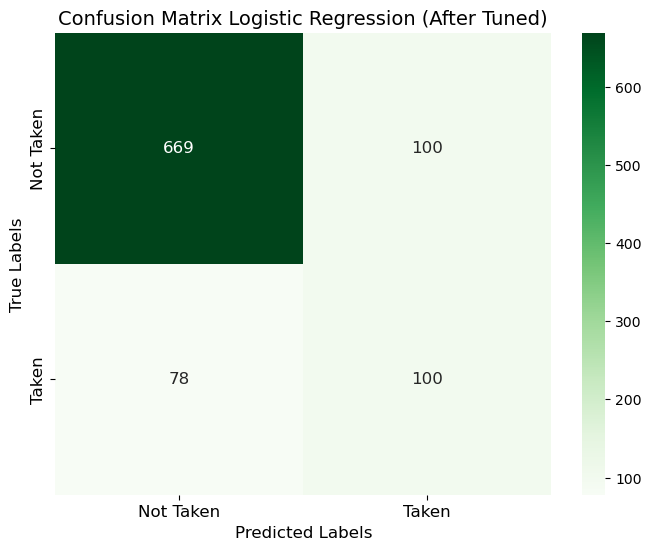

From Logistic Regression (After Tuned) Results Are:
- Number Of TP (True Positive) = 100
- Number Of (True Negative) = 669
- Number Of (False Positive) = 100
- Number Of (False Negative) = 78


In [50]:
model_lr = LogisticRegression(random_state=42)
tuned_lr = RandomizedSearchCV(model_lr, list_hyperparameters[0], cv=5, scoring='accuracy', random_state=42)
tuned_lr.fit(X_train, y_train)

plotting_confusion_matrix(tuned_lr, X_test, y_test, title='Logistic Regression (After Tuned)')

In [51]:
print('MODEL LOGISTIC REGRESSION AFTER HYPERPARAMETER TUNING')
print('=====================================================')
show_best_hyperparameter(tuned_lr, list_hyperparameters[0])
print('=====================================================')
eval_after_hyperparameter_tuning(tuned_lr, X_train, y_train, X_test, y_test)

MODEL LOGISTIC REGRESSION AFTER HYPERPARAMETER TUNING
Best penalty: l2
Best C: 6.158482110660261
Accuracy: 0.812
Precision: 0.5
Recall: 0.5618
F1 Score: 0.5291
AUC (Test): 0.4133
AUC (Train): 0.7978


# 2. Decision Tree

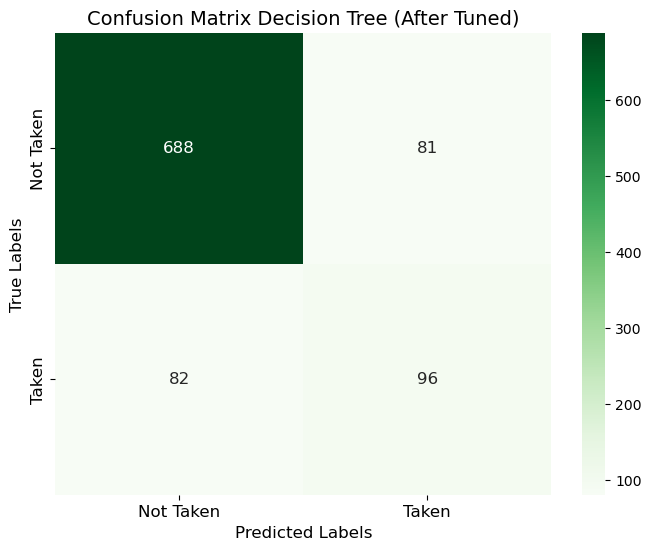

From Decision Tree (After Tuned) Results Are:
- Number Of TP (True Positive) = 96
- Number Of (True Negative) = 688
- Number Of (False Positive) = 81
- Number Of (False Negative) = 82


In [52]:
model_dt = DecisionTreeClassifier(random_state=42)
tuned_dt = RandomizedSearchCV(model_dt, list_hyperparameters[1], cv=5, scoring='accuracy', random_state=42)
tuned_dt.fit(X_train, y_train)

plotting_confusion_matrix(tuned_dt, X_test, y_test, title='Decision Tree (After Tuned)')

In [53]:
print('MODEL DECISION TREE AFTER HYPERPARAMETER TUNING')
print('===============================================')
show_best_hyperparameter(tuned_dt, list_hyperparameters[1])
print('===============================================')
eval_after_hyperparameter_tuning(tuned_dt, X_train, y_train, X_test, y_test)

MODEL DECISION TREE AFTER HYPERPARAMETER TUNING
Best max_depth: 80
Best min_samples_split: 6
Best min_samples_leaf: 1
Best max_features: sqrt
Accuracy: 0.8279
Precision: 0.5424
Recall: 0.5393
F1 Score: 0.5408
AUC (Test): 0.4349
AUC (Train): 0.8029


# 3. Random Forest

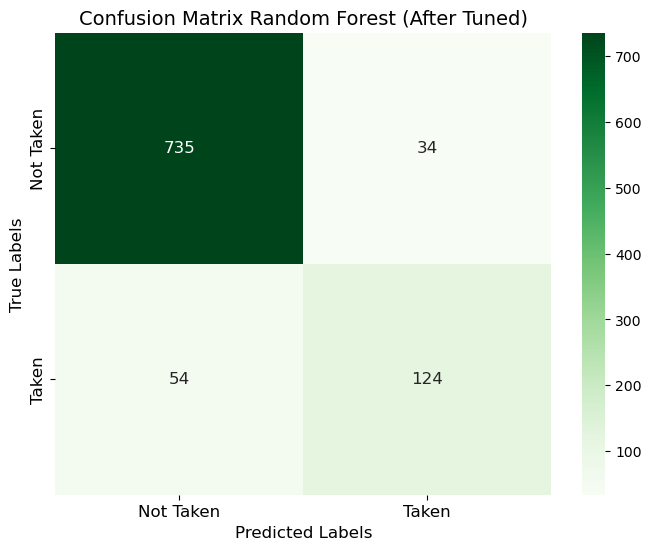

From Random Forest (After Tuned) Results Are:
- Number Of TP (True Positive) = 124
- Number Of (True Negative) = 735
- Number Of (False Positive) = 34
- Number Of (False Negative) = 54


In [54]:
model_rf = RandomForestClassifier(random_state=42)
tuned_rf = RandomizedSearchCV(model_rf, list_hyperparameters[2], cv=5, scoring='accuracy', random_state=42)
tuned_rf.fit(X_train, y_train)

plotting_confusion_matrix(tuned_rf, X_test, y_test, title='Random Forest (After Tuned)')

In [55]:
print('MODEL RANDOM FOREST AFTER HYPERPARAMETER TUNING')
print('===============================================')
show_best_hyperparameter(tuned_rf, list_hyperparameters[2])
print('===============================================')
eval_after_hyperparameter_tuning(tuned_rf, X_train, y_train, X_test, y_test)

MODEL RANDOM FOREST AFTER HYPERPARAMETER TUNING
Best n_estimators: 709
Best max_features: log2
Best max_depth: 50
Best criterion: entropy
Best min_samples_split: 6
Best min_samples_leaf: 1
Best class_weight: balanced
Best oob_score: True
Accuracy: 0.9071
Precision: 0.7848
Recall: 0.6966
F1 Score: 0.7381
AUC (Test): 0.6836
AUC (Train): 0.9495


# 4. AdaBoost

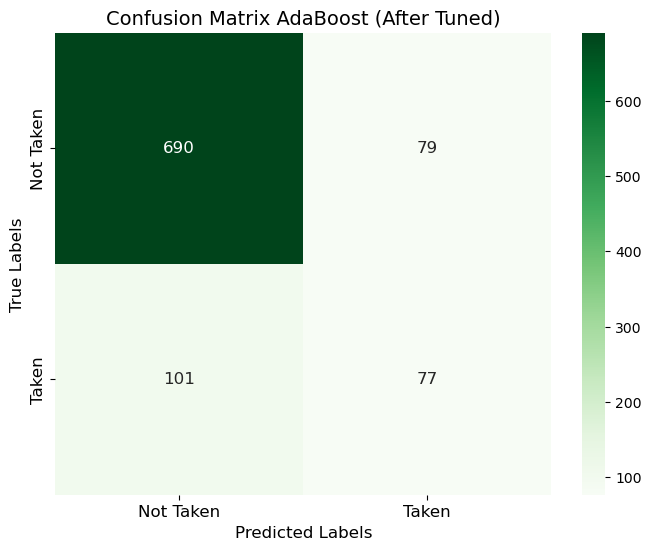

From AdaBoost (After Tuned) Results Are:
- Number Of TP (True Positive) = 77
- Number Of (True Negative) = 690
- Number Of (False Positive) = 79
- Number Of (False Negative) = 101


In [56]:
model_adb = AdaBoostClassifier(random_state=42)
tuned_adb = RandomizedSearchCV(model_adb, list_hyperparameters[3], cv=5, scoring='accuracy', random_state=42)
tuned_adb.fit(X_train, y_train)

plotting_confusion_matrix(tuned_adb, X_test, y_test, title='AdaBoost (After Tuned)')

In [57]:
print('MODEL ADABOOST AFTER HYPERPARAMETER TUNING')
print('==========================================')
show_best_hyperparameter(tuned_adb, list_hyperparameters[3])
print('==========================================')
eval_after_hyperparameter_tuning(tuned_adb, X_train, y_train, X_test, y_test)

MODEL ADABOOST AFTER HYPERPARAMETER TUNING
Best n_estimators: 1748
Best learning_rate: 0.047
Best algorithm: SAMME.R
Accuracy: 0.8099
Precision: 0.4936
Recall: 0.4326
F1 Score: 0.4611
AUC (Test): 0.3474
AUC (Train): 0.7912


# 5. XGBoost

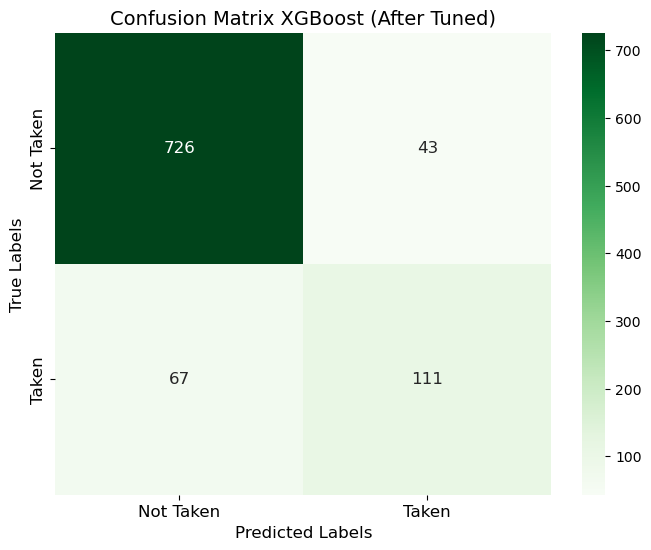

From XGBoost (After Tuned) Results Are:
- Number Of TP (True Positive) = 111
- Number Of (True Negative) = 726
- Number Of (False Positive) = 43
- Number Of (False Negative) = 67


In [58]:
model_xgb = XGBClassifier(random_state=42, verbosity=0)
tuned_xgb = RandomizedSearchCV(model_xgb, list_hyperparameters[-1], cv=5, scoring='accuracy', random_state=42)
tuned_xgb.fit(X_train, y_train)

plotting_confusion_matrix(tuned_xgb, X_test, y_test, title='XGBoost (After Tuned)')

In [59]:
print('MODEL XGBOOST AFTER HYPERPARAMETER TUNING')
print('=========================================')
show_best_hyperparameter(tuned_xgb, list_hyperparameters[-1])
print('=========================================')
eval_after_hyperparameter_tuning(tuned_xgb, X_train, y_train, X_test, y_test)

MODEL XGBOOST AFTER HYPERPARAMETER TUNING
Best max_depth: 45
Best min_child_weight: 8
Best gamma: 0.1
Best tree_method: approx
Best colsample_bytree: 0.9
Best learning_rate: 0.4646464646464647
Best reg_lambda: 0.9
Best reg_alpha: 0.4
Accuracy: 0.8838
Precision: 0.7208
Recall: 0.6236
F1 Score: 0.6687
AUC (Test): 0.601
AUC (Train): 0.9144


In [60]:
# base model
score_all_classification(model_list_base, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,MCC,AUC (Test),AUC (Train)
0,Logistic Regression,0.8110,0.4975,0.5618,0.5277,0.4113,0.7981,0.8096
1,Decision Tree,0.9113,0.7350,0.8258,0.7778,0.7245,0.8785,1.0000
2,Random Forest,0.9303,0.8684,0.7416,0.8000,0.7616,0.9598,1.0000
3,AdaBoost,0.8141,0.5060,0.4775,0.4913,0.3780,0.7892,0.8648
4,XGBoost,0.8976,0.7832,0.6292,0.6978,0.6426,0.9367,0.9999


In [61]:
# tuned model
model_list_tuned = [tuned_lr, tuned_dt, tuned_rf, tuned_adb, tuned_xgb]
score_all_classification(model_list_tuned, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,MCC,AUC (Test),AUC (Train)
0,Logistic Regression,0.8120,0.5000,0.5618,0.5291,0.4133,0.7978,0.8096
1,Decision Tree,0.8279,0.5424,0.5393,0.5408,0.4349,0.8029,0.9937
2,Random Forest,0.9071,0.7848,0.6966,0.7381,0.6836,0.9495,0.9998
3,AdaBoost,0.8099,0.4936,0.4326,0.4611,0.3474,0.7912,0.8679
4,XGBoost,0.8838,0.7208,0.6236,0.6687,0.6010,0.9144,0.9991


# Analysis:

Random Forest seems to perform the best across most metrics:

    
- It has the highest accuracy (0.9071) among all models.
- It also has the highest precision (0.7848) and F1 score (0.7381), indicating good overall performance in correctly identifying positive cases.
- The AUC score on both the test (0.9495) and train (0.9998) sets suggests robust performance in distinguishing between classes.
- The model also shows a high Matthews correlation coefficient (MCC) of 0.6836, indicating a strong correlation between predicted and actual values.


Conclusion:


Based on these metrics, Random Forest appears to be the best-performing model for your dataset. It balances high accuracy with good precision, recall, and F1 score, along with strong AUC metrics. 

RandomForest's ability to handle complex relationships and avoid overfitting (as indicated by similar AUC scores for train and test sets) makes it a suitable choice for business problem.






